# MAP433 - DM3

### *Groupe 43 : WANG XIAOZHEN & LAHIANI MAZIGH & CHEN YUNHAO*

## Question 15

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import operator
import datetime

In [2]:
dim = 7 #la dimension de l'espace
N_train= 1000
N_test = 300

In [18]:
#générer les datasets restreints dans le compact [-1,1]^dim
def generer (dim, N):
    x0 = np.ones(dim)*(-1/2)
    x1 = np.copy(-x0)
    cov = np.eye(dim)
    D0 = np.random.multivariate_normal(x0, cov, N)
    D1 = np.random.multivariate_normal(x1, cov, N)
    for k in range(len(D0)):
        if (np.max(np.abs(D0[k]))>1):
            while (np.max(np.abs(D0[k]))>1):
                D0[k] = np.random.multivariate_normal(x0, cov, 1)
    for k in range(len(D1)):
        if (np.max(np.abs(D1[k]))>1):
            while (np.max(np.abs(D1[k]))>1):
                D1[k] = np.random.multivariate_normal(x1, cov, 1)
    return D0, D1

### 15.(a)

Le classifieur Bayésien est :

\begin{align*}
\Phi^*(x) = \mathbb{1}_{\{\eta^*(x)\geq \frac{1}{2}\}}
\end{align*}

avec 

\begin{align*}
\eta^*(x) = \mathbb{E}[Y| X = x] = \frac{pq_1(x)}{(1-p)q_0(x)+pq_1(x)}
\end{align*}

On a maintenant deux distributions gaussiennes avec une covariance commune $I_d$. Et $\mu_0 = (\frac{1}{2},\frac{1}{2},...,\frac{1}{2})$, $\mu_1 = (-\frac{1}{2},-\frac{1}{2},...,-\frac{1}{2})$.

De plus, $Y$ suit une loi de Bernoulli de paramètre $\frac{1}{2}$. Alors $p = \mathbb{P}(Y=1) = \frac{1}{2}, 1-p = \mathbb{P}(Y=0) = \frac{1}{2}$  

Du coup le classifieur Bayésien est : 

\begin{align*}
\Phi^*(x) = \mathbb{1}_{\{ d(x,\mu_0) \geq d(x,\mu_1) \}}
\end{align*}

### 15.(b)

In [4]:
#définir le paramètre pour l'algorithme des k plus proches voisins
def kCalculator(d, n):
    a = int((np.power(np.log(n), 1.0*d / (d+2))) * np.power(n, 2/(d+2)))
    if a % 2 == 0 :
        a-=1
    return a

In [5]:
#renvoyer l'étiquette obtenu par l'algorithme des k plus proches voisins
def classify(inX,dataSet, labels, k):
    dataSetSize = dataSet.shape[0]
    diffMat = np.tile(inX,(dataSetSize,1))-dataSet
    sqDiffMat=diffMat**2
    sqDistances=sqDiffMat.sum(axis=1)
    distances=sqDistances**0.5 #calculer la distancec
    sortedDistIndicies=distances.argsort() #mise en ordre et renvoyer index

    a = 0
    for i in range(k):
        a+=labels[sortedDistIndicies[i]]
    if 2*a > k :
        return 1
    else:
        return 0

In [6]:
#fabriquer la série de données en donnant l'étiquette correspondante
def DataSet(fa, fb):
    len_a = len(fa)
    len_b = len(fb)
    group= np.vstack((fa,fb))
    labels=np.zeros(len_a+len_b)
    for i in range(len_b):
        labels[i+len_a] = 1
    return group,labels

In [7]:
def calAcc(f1_train, f2_train, f1_test, f2_test):
    group_train, labels_train = DataSet(f1_train, f2_train)
    group_test, labels_test = DataSet(f1_test, f2_test)
    len_f2_test = len(f2_test) # c'est le nombre de 1 dans labels_test
    a = 0
    for i in range(len(group_test)):
        if labels_test[i] == classify(group_test[i,:],group_train,labels_train,k):
            a+=1
    # a représente le nombre de prédictions correctes par l'algorithme des k plus proches voisins
    acc = 1 - (a / len(group_test))
    return acc

In [8]:
#acc est le taux d'erreur, qui peut représenter l'efficacité de cet algorithme.
starttime = datetime.datetime.now()
f1_train, f2_train = generer (dim, N_train)
f1_test, f2_test = generer (dim, N_test)
k = kCalculator(dim, N_train)
acc = calAcc(f1_train, f2_train, f1_test, f2_test)
endtime = datetime.datetime.now()
time = (endtime - starttime).seconds

print(f"quand la dimension est {dim}, le taux d'erreur de la méthode des k plus proches est {acc}.")
print(f"quand la dimension est {dim}, la durée de la méthode des k plus proches est {time}.")

quand la dimension est 7, le taux d'erreur de la méthode des k plus proches est 0.2316666666666667.
quand la dimension est 7, la durée de la méthode des k plus proches est 13.


On a calculé le taux d'erreur et la durée de l'algorithme des k plus proches voisins. Ces deux parametres représentent l'efficacité de l'algorithme. 

Quand la dimension est 7 (le cas ici), le taux d'erreur est entre 0.20-0.30 et la durée est une dizaine de seconds.

### 15.(c)

In [9]:
d_set = np.array([2, 3, 5, 7, 10])
acc_set = np.zeros(d_set.shape)
time_set = np.zeros(d_set.shape)
i = 0
for dim in d_set:
    starttime = datetime.datetime.now()
    f1_train, f2_train = generer(dim, N_train)
    f1_test, f2_test = generer(dim, N_test)
    k = kCalculator(dim, N_train)
    acc_set[i] = calAcc(f1_train, f2_train, f1_test, f2_test)
    endtime = datetime.datetime.now()
    time_set[i] = (endtime - starttime).seconds
    print(f"la durée est {time_set[i]} quand la dimension est {dim}.")
    print(f"le taux d'erreur est {acc_set[i]} quand la dimension est {dim}.")
    print('----------------------------------------------------------------')
    i+=1

la durée est 1.0 quand la dimension est 2.
le taux d'erreur est 0.33999999999999997 quand la dimension est 2.
----------------------------------------------------------------
la durée est 1.0 quand la dimension est 3.
le taux d'erreur est 0.3466666666666667 quand la dimension est 3.
----------------------------------------------------------------
la durée est 5.0 quand la dimension est 5.
le taux d'erreur est 0.28500000000000003 quand la dimension est 5.
----------------------------------------------------------------
la durée est 14.0 quand la dimension est 7.
le taux d'erreur est 0.245 quand la dimension est 7.
----------------------------------------------------------------
la durée est 57.0 quand la dimension est 10.
le taux d'erreur est 0.2666666666666667 quand la dimension est 10.
----------------------------------------------------------------


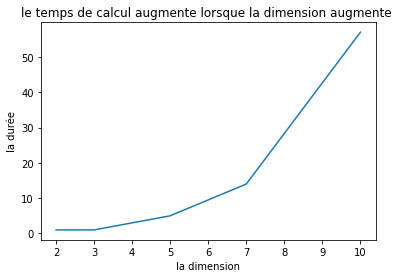

In [10]:
plt.plot(d_set, time_set)
plt.xlabel('la dimension')
plt.ylabel("la durée")
plt.title("le temps de calcul augmente lorsque la dimension augmente ")
plt.show()

### Conclusion:
Le temps de calcul augmente lorsque la dimension augmente. Et cette augmentation n'est pas linéaire. Donc on parle de la dégradation de la vitesse.

C'est tout à fait raisonable. Quand la dimension augmente, c'est difficle de restreindre les données dans le compact [-1,1]^dim. Alors il faut jeter les données dehors et rependre, cela evidemment va prendre du temps.  

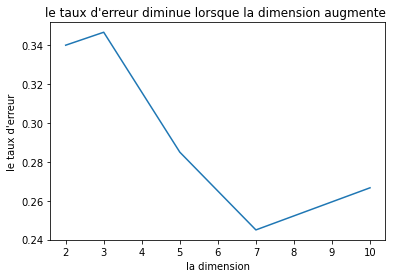

In [11]:
plt.plot(d_set, acc_set)
plt.xlabel('la dimension')
plt.ylabel("le taux d'erreur")
plt.title("le taux d'erreur diminue lorsque la dimension augmente ")
plt.show()

### Conclusion bonus:
On peut alors voir que le taux d'erreur de l'algorithme diminue quand la dimension de l'espace augmente.

### 15.(d)

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

Dans ce contexte, on va comparer l'efficacité de l'algorithme de LDA et celle de l'algorithme des k plus proches voisins.

On fixe dim = 5.


In [13]:
dim = 5
mean1 = np.full((dim,),1/2) 
mean2 = np.full((dim,),-1/2)

In [14]:
def LDA_train(dim, N_train):
    model = LDA()
    f1_train, f2_train = generer (dim, N_train)
    groups, labels = DataSet(f1_train, f2_train)
    X = [data for data in groups]
    Y = [label for label in labels]
    model.fit(X,Y)
    return model

In [15]:
def LDA_test(dim, N_train, N_test):
    t0 = datetime.datetime.now()
    f1_test, f2_test = generer (dim, N_test)
    groups_test, labels_test = DataSet(f1_test, f2_test)
    X_test = [data_test for data_test in groups_test]
    model = LDA_train(dim, N_train)
    y_test = model.predict(X_test)
    sum = 0
    for i in range(N_test):
        sum += y_test[i] == labels_test[i]
    return 1 - sum/N_test, (datetime.datetime.now()-t0).seconds

In [16]:
starttime = datetime.datetime.now()
f1_train, f2_train = generer (dim, N_train)
f1_test, f2_test = generer (dim, N_test)
k = kCalculator(dim, N_train)
acc = calAcc(f1_train, f2_train, f1_test, f2_test)
endtime = datetime.datetime.now()
time = (endtime - starttime).seconds

print(f"quand la dimension est {dim}, le taux d'erreur de la méthode des k plus proches est {acc}.")
print(f"quand la dimension est {dim}, le temps de calcul de la méthode des k plus proches est {time}.")

quand la dimension est 5, le taux d'erreur de la méthode des k plus proches est 0.30000000000000004.
quand la dimension est 5, le temps de calcul de la méthode des k plus proches est 5.


In [17]:
acc_LDA, time_LDA = LDA_test(dim, N_train, N_test)

print(f"quand la dimension est {dim}, le taux d'erreur de LDA est {acc_LDA}.")
print(f"quand la dimension est {dim}, la durée de LDA est {time_LDA}.")

quand la dimension est 5, le taux d'erreur de LDA est 0.2466666666666667.
quand la dimension est 5, la durée de LDA est 4.


On peut montrer numériquement que LDA est plus efficace que l'algorithme des k plus proches voisins. 

Le taux d'erreur de LDA est plus petit et le temps de calcul est plus court.